In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
from scipy import stats

%config InlineBackend.figure_format = 'retina'

In [2]:
SPECIES = ['Human', 'Humanized', 'Humanized/Chimeric', 'Chimeric', 'Mouse']
SPECIES_COLORS = ['tab:blue', 'tab:green', '#eecc00', 'tab:orange', '#dd0033']

TASK_DIR = '../../data/tasks/humanness'
PREFIX = os.path.join(TASK_DIR, 'imgt_mab_db')

In [3]:
mabs_full = pd.read_csv(PREFIX+'.tsv', sep='\t', index_col=0)
mabs_full.head()

,Antibody,Species
INN_Number,,
8659,abagovomab,Mouse
10881,abelacimab,Human
9509,abituzumab,Humanized
10745,abrezekimab,Humanized
9921,abrilumab,Human


In [4]:
mabs_full['Species'].value_counts()

Humanized             229
Human                 198
Chimeric               63
Humanized/Chimeric     41
Mouse                  13
Human/Humanized         7
Caninized               6
Human/Chimeric          4
Felinized               3
Name: Species, dtype: int64

In [5]:
mabs = mabs_full[mabs_full['Species'].isin(SPECIES)]
print('Selected mabs:', len(mabs))
mabs['Species'].value_counts()

Selected mabs: 544


Humanized             229
Human                 198
Chimeric               63
Humanized/Chimeric     41
Mouse                  13
Name: Species, dtype: int64

In [6]:
def seq_id_to_inn(seq_id):
    return int(seq_id.split('_')[0])

## OASis

In [7]:
oasis_meta = pd.read_excel(PREFIX+'_oasis.xlsx', index_col=0)
oasis_meta.head()

,Threshold,OASis Percentile,OASis Identity,Heavy V Germline,Heavy J Germline,Heavy OASis Percentile,Heavy OASis Identity,Heavy Non-human peptides,Light V Germline,Light J Germline,Light OASis Percentile,Light OASis Identity,Light Non-human peptides
Antibody,,,,,,,,,,,,,
10002_seq1,relaxed,0.329909,0.736364,IGHV3-21*01,IGHJ4*01,0.407182,0.736364,29.0,NaN,NaN,NaN,NaN,NaN
10002_seq2,relaxed,0.133097,0.660194,NaN,NaN,NaN,NaN,NaN,IGKV1-33*01,IGKJ1*01,0.126136,0.660194,35.0
10010_seq1,relaxed,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,IGKV3-20*01,IGKJ1*01,1.000000,1.000000,0.0
10010_seq2,relaxed,0.910009,0.955752,IGHV3-7*01,IGHJ4*01,0.968106,0.955752,5.0,NaN,NaN,NaN,NaN,NaN
10013_seq1,relaxed,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,IGKV1-5*03,IGKJ2*01,1.000000,1.000000,0.0


In [8]:
chain_types = oasis_meta.apply(lambda row: 'Light' if pd.isna(row['Heavy V Germline']) else 'Heavy', axis=1).rename('Chain')
chain_types.head()

Antibody
10002_seq1    Heavy
10002_seq2    Light
10010_seq1    Light
10010_seq2    Heavy
10013_seq1    Light
Name: Chain, dtype: object

In [9]:
oasis_curves = pd.read_excel(PREFIX+'_oasis.xlsx', sheet_name='OASis Curves', index_col=0)
# NOTE: when the antibody contains multiple heavy chain or multiple light chain sequences, we take an average
oasis_curves = oasis_curves.groupby([oasis_curves.index.map(seq_id_to_inn), chain_types.loc[oasis_curves.index]]).mean()
oasis_curves.head()

0%        1%        2%        3%        4%        5%  \
Antibody Chain                                                          
7164     Heavy  1.0  0.824074  0.814815  0.814815  0.814815  0.805556   
         Light  1.0  0.846939  0.806122  0.806122  0.795918  0.795918   
7471     Heavy  1.0  0.611111  0.583333  0.564815  0.555556  0.527778   
         Light  1.0  0.707071  0.646465  0.626263  0.585859  0.585859   
7602     Heavy  1.0  0.792793  0.792793  0.783784  0.720721  0.666667   

                      6%        7%        8%        9%  ...       81%  \
Antibody Chain                                          ...             
7164     Heavy  0.796296  0.796296  0.787037  0.777778  ...  0.675926   
         Light  0.795918  0.785714  0.775510  0.775510  ...  0.642857   
7471     Heavy  0.527778  0.518519  0.518519  0.509259  ...  0.212963   
         Light  0.565657  0.565657  0.555556  0.555556  ...  0.323232   
7602     Heavy  0.666667  0.657658  0.648649  0.648649  ...  0.180180   

                     82%       83%       84%       85%       86%       87%  \
Antibody Chain                                                               
7164     Heavy  0.666667  0.657407  0.620370  0.620370  0.620370  0.620370   
         Light  0.642857  0.632653  0.632653  0.632653  0.632653  0.632653   
7471     Heavy  0.212963  0.194444  0.194444  0.194444  0.185185  0.175926   
         Light  0.323232  0.323232  0.323232  0.323232  0.313131  0.303030   
7602     Heavy  0.180180  0.180180  0.171171  0.171171  0.171171  0.171171   

                     88%       89%       90%  
Antibody Chain                                
7164     Heavy  0.620370  0.611111  0.611111  
         Light  0.622449  0.602041  0.602041  
7471     Heavy  0.175926  0.175926  0.175926  
         Light  0.262626  0.242424  0.242424  
7602     Heavy  0.171171  0.171171  0.171171  

[5 rows x 91 columns]

In [10]:
oasis_heavy_curves = oasis_curves[oasis_curves.index.get_level_values('Chain') == 'Heavy'].reset_index(level=1, drop=True)
oasis_heavy_curves.head()

,0%,1%,2%,3%,4%,5%,6%,7%,8%,9%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
Antibody,,,,,,,,,,,,,,,,,,,,,
7164,1.0,0.824074,0.814815,0.814815,0.814815,0.805556,0.796296,0.796296,0.787037,0.777778,...,0.675926,0.666667,0.657407,0.620370,0.620370,0.620370,0.620370,0.620370,0.611111,0.611111
7471,1.0,0.611111,0.583333,0.564815,0.555556,0.527778,0.527778,0.518519,0.518519,0.509259,...,0.212963,0.212963,0.194444,0.194444,0.194444,0.185185,0.175926,0.175926,0.175926,0.175926
7602,1.0,0.792793,0.792793,0.783784,0.720721,0.666667,0.666667,0.657658,0.648649,0.648649,...,0.180180,0.180180,0.180180,0.171171,0.171171,0.171171,0.171171,0.171171,0.171171,0.171171
7609,1.0,0.566372,0.548673,0.539823,0.539823,0.522124,0.522124,0.522124,0.513274,0.477876,...,0.141593,0.141593,0.132743,0.123894,0.123894,0.123894,0.115044,0.115044,0.115044,0.115044
7637,1.0,0.750000,0.741071,0.741071,0.723214,0.714286,0.714286,0.705357,0.705357,0.705357,...,0.544643,0.544643,0.544643,0.544643,0.544643,0.544643,0.544643,0.544643,0.544643,0.535714


In [11]:
oasis_light_curves = oasis_curves[oasis_curves.index.get_level_values('Chain') == 'Light'].reset_index(level=1, drop=True)
oasis_light_curves.head()

,0%,1%,2%,3%,4%,5%,6%,7%,8%,9%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
Antibody,,,,,,,,,,,,,,,,,,,,,
7164,1.0,0.846939,0.806122,0.806122,0.795918,0.795918,0.795918,0.785714,0.775510,0.775510,...,0.642857,0.642857,0.632653,0.632653,0.632653,0.632653,0.632653,0.622449,0.602041,0.602041
7471,1.0,0.707071,0.646465,0.626263,0.585859,0.585859,0.565657,0.565657,0.555556,0.555556,...,0.323232,0.323232,0.323232,0.323232,0.323232,0.313131,0.303030,0.262626,0.242424,0.242424
7602,1.0,0.595960,0.525253,0.515152,0.474747,0.454545,0.454545,0.444444,0.424242,0.414141,...,0.212121,0.212121,0.212121,0.212121,0.212121,0.212121,0.212121,0.212121,0.212121,0.212121
7609,1.0,0.663265,0.581633,0.540816,0.489796,0.479592,0.479592,0.479592,0.469388,0.469388,...,0.234694,0.234694,0.234694,0.234694,0.234694,0.224490,0.224490,0.214286,0.214286,0.214286
7637,1.0,0.898990,0.898990,0.858586,0.858586,0.858586,0.858586,0.848485,0.838384,0.828283,...,0.676768,0.676768,0.676768,0.676768,0.676768,0.676768,0.676768,0.676768,0.676768,0.676768


## Humanness percentile

In [118]:
STEPS = np.arange(0, 101, 1)
DELTA = 1e-10

def map_humanness_percentile(humanness_at_threshold):
    # slow but reliable
    p = pd.Series(STEPS/100, index=STEPS).apply(lambda v: stats.percentileofscore(humanness_at_threshold, v + DELTA) / 100)
    p.index.name = 'humanness'
    return p

In [119]:
heavy_percentile = oasis_heavy_curves.iloc[:,1:].apply(map_humanness_percentile)
heavy_percentile

,1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
humanness,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.003578,0.003578,0.003578,0.003578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.890877,0.930233,0.939177,0.946333,0.953488,0.962433,0.973166,0.974955,0.978533,0.980322,...,0.998211,0.998211,0.998211,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000
97,0.930233,0.951699,0.966011,0.967800,0.978533,0.978533,0.980322,0.985689,0.987478,0.987478,...,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000
98,0.960644,0.969589,0.978533,0.985689,0.989267,0.989267,0.989267,0.989267,0.991055,0.991055,...,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000


In [120]:
light_percentile = oasis_light_curves.iloc[:,1:].apply(map_humanness_percentile)
light_percentile

,1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
humanness,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.687389,0.722913,0.724689,0.742451,0.744227,0.747780,0.753108,0.756661,0.756661,0.763766,...,0.868561,0.868561,0.870337,0.875666,0.879218,0.884547,0.884547,0.891652,0.898757,0.898757
97,0.710480,0.740675,0.744227,0.754885,0.758437,0.760213,0.765542,0.767318,0.772647,0.777975,...,0.879218,0.882771,0.882771,0.886323,0.888099,0.895204,0.896980,0.902309,0.904085,0.904085
98,0.726465,0.749556,0.754885,0.761989,0.769094,0.776199,0.777975,0.783304,0.786856,0.790409,...,0.889876,0.893428,0.893428,0.898757,0.902309,0.904085,0.905861,0.907638,0.909414,0.911190


In [121]:
percentile = oasis_curves.groupby(level='Antibody').mean().iloc[:,1:].apply(map_humanness_percentile)
percentile

,1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
humanness,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.806738,0.829787,0.851064,0.861702,0.879433,0.890071,0.902482,0.913121,0.925532,0.927305,...,0.991135,0.991135,0.991135,0.991135,0.992908,0.992908,0.992908,0.996454,0.996454,0.996454
97,0.847518,0.888298,0.906028,0.920213,0.932624,0.939716,0.945035,0.946809,0.950355,0.950355,...,0.994681,0.994681,0.994681,0.996454,0.996454,0.996454,0.996454,0.996454,0.996454,0.996454
98,0.920213,0.948582,0.955674,0.964539,0.969858,0.973404,0.976950,0.978723,0.978723,0.978723,...,0.996454,0.996454,0.996454,0.996454,0.996454,0.996454,0.996454,0.996454,0.996454,0.996454


## Save TSV

In [122]:
heavy_percentile.to_csv(PREFIX+'_percentile_heavy.tsv', sep='\t')
light_percentile.to_csv(PREFIX+'_percentile_light.tsv', sep='\t')
percentile.to_csv(PREFIX+'_percentile.tsv', sep='\t')

## Plots

In [73]:
heavy_mean_curves = oasis_heavy_curves.groupby(mabs_full.loc[oasis_heavy_curves.index]['Species']).mean()
heavy_mean_curves

,0%,1%,2%,3%,4%,5%,6%,7%,8%,9%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
Species,,,,,,,,,,,,,,,,,,,,,
Caninized,1.0,0.746651,0.719236,0.692195,0.684718,0.664104,0.653541,0.647755,0.641769,0.632817,...,0.412942,0.411517,0.408455,0.408455,0.406868,0.402178,0.400754,0.397867,0.392132,0.387720
Chimeric,1.0,0.681049,0.646717,0.623666,0.608428,0.592275,0.582332,0.575288,0.566955,0.550721,...,0.305300,0.301938,0.298934,0.296085,0.290578,0.287559,0.283967,0.282821,0.279487,0.273886
Felinized,1.0,0.751728,0.737108,0.713716,0.695853,0.684051,0.678097,0.672249,0.669325,0.654492,...,0.318501,0.318501,0.318501,0.318501,0.315470,0.315470,0.309516,0.300638,0.294684,0.288623
Human,1.0,0.929637,0.919209,0.912263,0.907393,0.901016,0.897716,0.894285,0.891158,0.886960,...,0.770633,0.769393,0.767318,0.765712,0.762454,0.760288,0.757931,0.754609,0.748747,0.744022
Human/Chimeric,1.0,0.814193,0.799382,0.780184,0.772738,0.765302,0.756825,0.752552,0.746156,0.744090,...,0.591564,0.587361,0.587361,0.587361,0.584128,0.580923,0.580923,0.579826,0.575624,0.570314
Human/Humanized,1.0,0.880033,0.872858,0.866433,0.857586,0.841550,0.836439,0.835050,0.834325,0.830609,...,0.724201,0.724201,0.721984,0.717464,0.710703,0.709214,0.704709,0.697452,0.689296,0.687146
Humanized,1.0,0.807298,0.791422,0.780021,0.770874,0.760300,0.753885,0.748946,0.744232,0.739642,...,0.590969,0.589431,0.587670,0.585511,0.581697,0.579312,0.577662,0.575114,0.568943,0.564643
Humanized/Chimeric,1.0,0.824207,0.809222,0.796737,0.780950,0.770037,0.762396,0.757275,0.752405,0.745401,...,0.552738,0.551550,0.549031,0.545923,0.541159,0.536483,0.533140,0.532689,0.527808,0.525370
Mouse,1.0,0.644634,0.606061,0.585404,0.566140,0.530988,0.524855,0.515225,0.504951,0.478780,...,0.234049,0.233362,0.227817,0.225051,0.224364,0.220892,0.220180,0.220180,0.217432,0.209907


In [82]:
light_mean_curves = oasis_light_curves.groupby(mabs_full.loc[oasis_light_curves.index]['Species']).mean()
light_mean_curves

,0%,1%,2%,3%,4%,5%,6%,7%,8%,9%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
Species,,,,,,,,,,,,,,,,,,,,,
Caninized,1.0,0.794244,0.759589,0.737802,0.711176,0.711176,0.694571,0.683129,0.674873,0.666551,...,0.432764,0.432764,0.432764,0.431146,0.427878,0.426194,0.426194,0.422989,0.418004,0.418004
Chimeric,1.0,0.757981,0.712693,0.699825,0.673982,0.666161,0.656364,0.647958,0.634564,0.625561,...,0.395404,0.393995,0.393995,0.391640,0.391327,0.389070,0.386503,0.384775,0.382845,0.381429
Felinized,1.0,0.824916,0.797980,0.787879,0.754209,0.750842,0.734007,0.727273,0.720539,0.713805,...,0.451178,0.447811,0.447811,0.447811,0.444444,0.434343,0.434343,0.434343,0.434343,0.434343
Human,1.0,0.974943,0.968729,0.966758,0.963591,0.962390,0.960126,0.958942,0.956180,0.955525,...,0.886796,0.885534,0.884981,0.883115,0.881834,0.879506,0.878487,0.876354,0.873145,0.871193
Human/Chimeric,1.0,0.926980,0.910817,0.907104,0.903391,0.903391,0.903391,0.902141,0.897153,0.897153,...,0.806344,0.806344,0.803844,0.798818,0.798818,0.796267,0.795030,0.791280,0.783804,0.781304
Human/Humanized,1.0,0.933725,0.925801,0.921471,0.917171,0.912928,0.908584,0.903534,0.899954,0.898539,...,0.814759,0.811930,0.810473,0.806172,0.804729,0.804729,0.804008,0.801158,0.796857,0.796857
Humanized,1.0,0.863768,0.839829,0.831924,0.821406,0.816173,0.807901,0.804284,0.796547,0.793897,...,0.672101,0.670826,0.670087,0.669143,0.668666,0.667527,0.664785,0.662040,0.658725,0.657194
Humanized/Chimeric,1.0,0.802428,0.785021,0.776688,0.765452,0.759469,0.751038,0.749357,0.744167,0.740797,...,0.591518,0.590209,0.590085,0.587945,0.587216,0.586486,0.581066,0.576337,0.574170,0.572010
Mouse,1.0,0.762136,0.716296,0.703908,0.682897,0.674380,0.660408,0.654999,0.641774,0.635595,...,0.328383,0.326829,0.326829,0.326052,0.322944,0.318312,0.317535,0.314427,0.308211,0.305880


In [112]:
mean_curves = oasis_curves.groupby(mabs_full.loc[oasis_curves.index.get_level_values(0)]['Species'].values).mean()
mean_curves

,0%,1%,2%,3%,4%,5%,6%,7%,8%,9%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
Caninized,1.0,0.770447,0.739412,0.714999,0.697947,0.687640,0.674056,0.665442,0.658321,0.649684,...,0.422853,0.422141,0.420610,0.419801,0.417373,0.414186,0.413474,0.410428,0.405068,0.402862
Chimeric,1.0,0.719515,0.679705,0.661746,0.641205,0.629218,0.619348,0.611623,0.600760,0.588141,...,0.350352,0.347967,0.346465,0.343862,0.340952,0.338314,0.335235,0.333798,0.331166,0.327658
Felinized,1.0,0.788322,0.767544,0.750797,0.725031,0.717446,0.706052,0.699761,0.694932,0.684149,...,0.384840,0.383156,0.383156,0.383156,0.379957,0.374907,0.371930,0.367491,0.364514,0.361483
Human,1.0,0.952405,0.944095,0.939649,0.935635,0.931858,0.929079,0.926777,0.923834,0.921416,...,0.829009,0.827759,0.826449,0.824711,0.822447,0.820200,0.818515,0.815790,0.811261,0.807930
Human/Chimeric,1.0,0.870587,0.855099,0.843644,0.838064,0.834346,0.830108,0.827346,0.821655,0.820622,...,0.698954,0.696853,0.695603,0.693090,0.691473,0.688595,0.687976,0.685553,0.679714,0.675809
Human/Humanized,1.0,0.908944,0.901366,0.896069,0.889670,0.879984,0.875286,0.871926,0.869664,0.867187,...,0.772963,0.771440,0.769632,0.765230,0.761332,0.760645,0.758178,0.753294,0.747214,0.746221
Humanized,1.0,0.835595,0.815679,0.806029,0.796195,0.788298,0.780952,0.776676,0.770447,0.766829,...,0.631624,0.630218,0.628969,0.627419,0.625277,0.623516,0.621319,0.618673,0.613933,0.611020
Humanized/Chimeric,1.0,0.813317,0.797121,0.786712,0.773201,0.764753,0.756717,0.753316,0.748286,0.743099,...,0.572128,0.570879,0.569558,0.566934,0.564187,0.561485,0.557103,0.554513,0.550989,0.548690
Mouse,1.0,0.703385,0.661179,0.644656,0.624518,0.602684,0.592632,0.585112,0.573362,0.557188,...,0.281216,0.280096,0.277323,0.275551,0.273654,0.269602,0.268857,0.267303,0.262822,0.257894


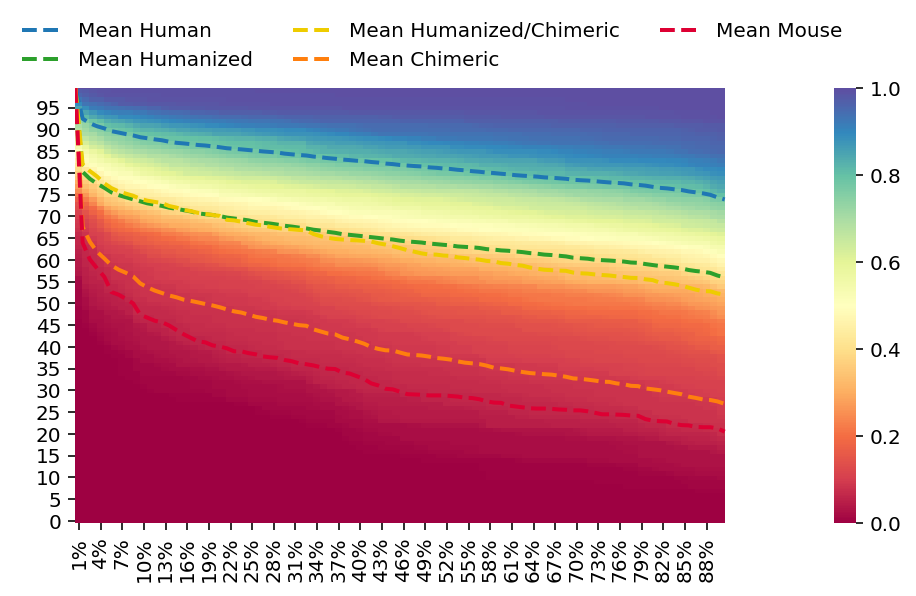

In [83]:
fig, ax = plt.subplots(figsize=(8, 4))
(heavy_mean_curves * 100).T[SPECIES].add_prefix('Mean ').plot(ax=ax, lw=2, ls='--', color=SPECIES_COLORS);
sns.heatmap(heavy_percentile, cmap='Spectral', ax=ax)
ax.set_ylim(0, 100);
ax.set_xlim(0, 99);
ax.legend(loc='lower center', frameon=False, ncol=3, bbox_to_anchor=(0.5, 1));

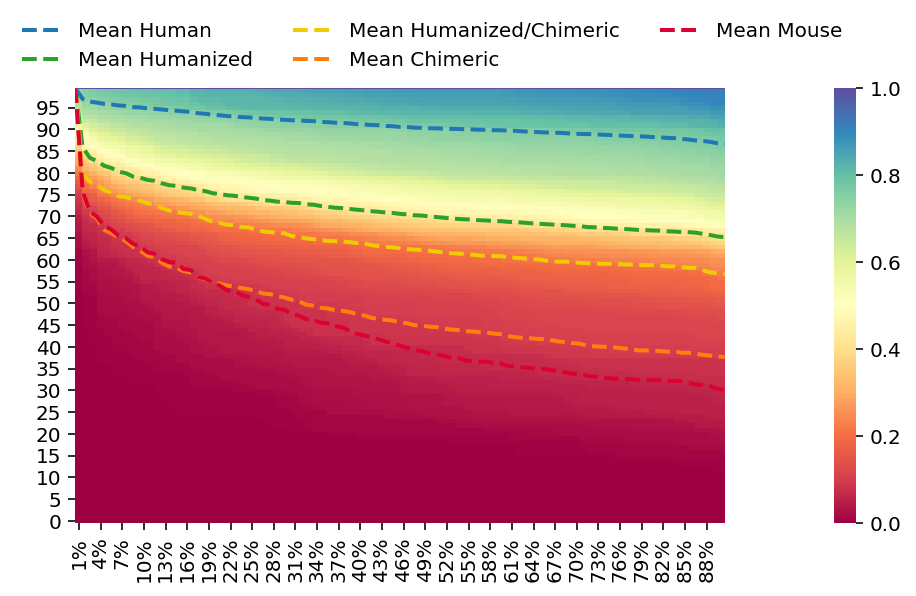

In [84]:
fig, ax = plt.subplots(figsize=(8, 4))
(light_mean_curves * 100).T[SPECIES].add_prefix('Mean ').plot(ax=ax, lw=2, ls='--', color=SPECIES_COLORS);
sns.heatmap(light_percentile, cmap='Spectral', ax=ax)
ax.set_ylim(0, 100);
ax.set_xlim(0, 99);
ax.legend(loc='lower center', frameon=False, ncol=3, bbox_to_anchor=(0.5, 1));

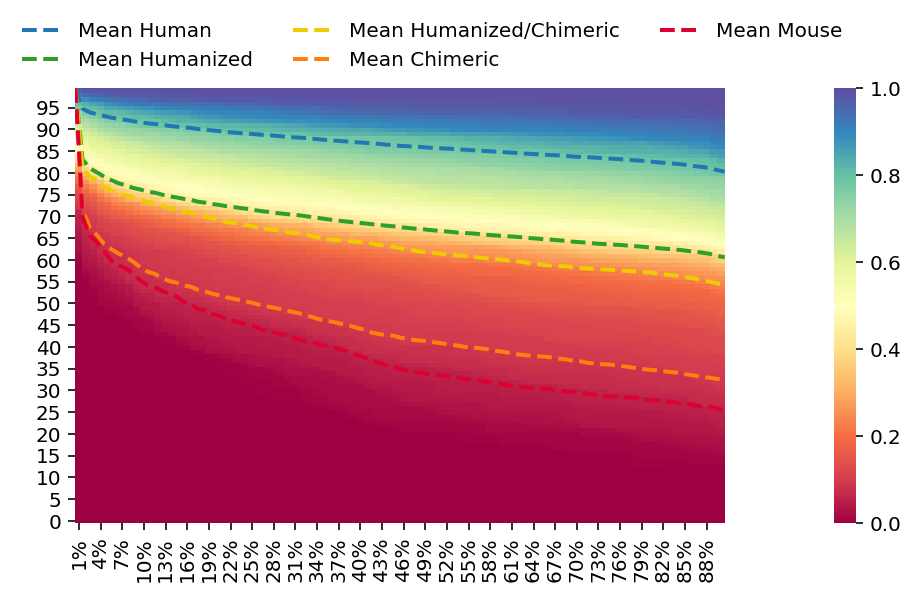

In [113]:
fig, ax = plt.subplots(figsize=(8, 4))
(mean_curves * 100).T[SPECIES].add_prefix('Mean ').plot(ax=ax, lw=2, ls='--', color=SPECIES_COLORS);
sns.heatmap(percentile, cmap='Spectral', ax=ax)
ax.set_ylim(0, 100);
ax.set_xlim(0, 99);
ax.legend(loc='lower center', frameon=False, ncol=3, bbox_to_anchor=(0.5, 1));

In [98]:
# Generate percentile matrix using:
print('# subject threshold -> percentile at 0-100% identity')
print('HEAVY_PERCENTILES = {')
print('    '+ ',\n    '.join("{}: [{}]".format(int(k.replace('%','')), ', '.join(['0' if x == 0 else f'{x:.3f}' for x in v])) for k, v in heavy_percentile.to_dict('list').items()))
print('}')

# subject threshold -> percentile at 0-100% identity
HEAVY_PERCENTILES = {
    1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002, 0.002, 0.005, 0.005, 0.007, 0.009, 0.011, 0.011, 0.011, 0.013, 0.014, 0.020, 0.036, 0.041, 0.045, 0.045, 0.048, 0.054, 0.061, 0.064, 0.064, 0.068, 0.081, 0.088, 0.093, 0.102, 0.106, 0.132, 0.138, 0.168, 0.215, 0.243, 0.275, 0.304, 0.336, 0.369, 0.397, 0.419, 0.453, 0.481, 0.501, 0.542, 0.572, 0.608, 0.646, 0.680, 0.703, 0.726, 0.771, 0.801, 0.852, 0.891, 0.930, 0.961, 0.975, 1.000],
    2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002, 0.002, 0.002, 0.002, 0.004, 0.005, 0.009, 0.009, 0.011, 0.018, 0.021, 0.021, 0.030, 0.034, 0.041, 0.048, 0.050, 0.054, 0.054, 0.059, 0.059, 0.063, 0.064, 0.068, 0.075, 0.081, 0.086, 0.097, 0.104, 0.113, 0.132, 0.147, 0.168, 0.190, 0.224, 0.263, 0.301, 0.

In [99]:
# Generate percentile matrix using:
print('# subject threshold -> percentile at 0-100% identity')
print('LIGHT_PERCENTILES = {')
print('    '+ ',\n    '.join("{}: [{}]".format(int(k.replace('%','')), ', '.join(['0' if x == 0 else f'{x:.3f}' for x in v])) for k, v in light_percentile.to_dict('list').items()))
print('}')

# subject threshold -> percentile at 0-100% identity
LIGHT_PERCENTILES = {
    1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002, 0.002, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005, 0.005, 0.005, 0.007, 0.007, 0.007, 0.009, 0.009, 0.011, 0.023, 0.027, 0.027, 0.028, 0.037, 0.037, 0.044, 0.048, 0.066, 0.069, 0.076, 0.087, 0.094, 0.117, 0.144, 0.160, 0.185, 0.215, 0.247, 0.284, 0.302, 0.323, 0.355, 0.382, 0.410, 0.464, 0.490, 0.529, 0.556, 0.584, 0.609, 0.650, 0.677, 0.687, 0.710, 0.726, 0.734, 1.000],
    2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002, 0.002, 0.002, 0.002, 0.002, 0.004, 0.004, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.007, 0.007, 0.009, 0.009, 0.012, 0.012, 0.014, 0.016, 0.021, 0.023, 0.027, 0.030, 0.046, 0.046, 0.057, 0.060, 0.064, 0.067, 0.073, 0.083, 0.091, 0.107, 0.115, 0.146, 0.16

In [114]:
# Generate percentile matrix using:
print('# subject threshold -> percentile at 0-100% identity')
print('MEAN_PERCENTILES = {')
print('    '+ ',\n    '.join("{}: [{}]".format(int(k.replace('%','')), ', '.join(['0' if x == 0 else f'{x:.3f}' for x in v])) for k, v in percentile.to_dict('list').items()))
print('}')

# subject threshold -> percentile at 0-100% identity
MEAN_PERCENTILES = {
    1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.007, 0.009, 0.021, 0.025, 0.030, 0.032, 0.035, 0.044, 0.050, 0.055, 0.059, 0.066, 0.089, 0.099, 0.110, 0.122, 0.133, 0.163, 0.191, 0.213, 0.243, 0.287, 0.340, 0.388, 0.452, 0.473, 0.498, 0.528, 0.559, 0.587, 0.606, 0.638, 0.668, 0.695, 0.725, 0.768, 0.807, 0.848, 0.920, 0.968, 1.000],
    2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002, 0.002, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.007, 0.014, 0.021, 0.028, 0.032, 0.039, 0.043, 0.048, 0.053, 0.059, 0.062, 0.066, 0.074, 0.083, 0.094, 0.108, 0.122, 0.137, 0.154, 0.168, 0.195, 0.223, 0.257, 0.298, 0.342, 0.387, 0.431, 0.477